# <span style="color:blue"> Numerical Simulation Laboratory (NSL) </span>
    
##  <span style="color:blue"> Edoardo Baraldi - Notebook 7 </span>  

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

## Exercise 07.2

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
from multiprocessing import Pool

plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"]= (11,7)

def autocorrelation(x, lag):
    max_lag=x.size-lag
    autocor=np.zeros(lag)
    x1=np.mean(x)
    x1_2=np.mean(x**2)
    sigma=x1_2-pow(x1,2)
    for t in range(lag):
        x2=np.mean(x[t:])
        x3=np.mean(x[:x.size-t])
        x4=np.mean(x[:x.size-t]*x[t:])
        autocor[t]=(x4-x3*x2)/sigma
    return autocor

##  <span style="color:red"> Equilibration</span>  

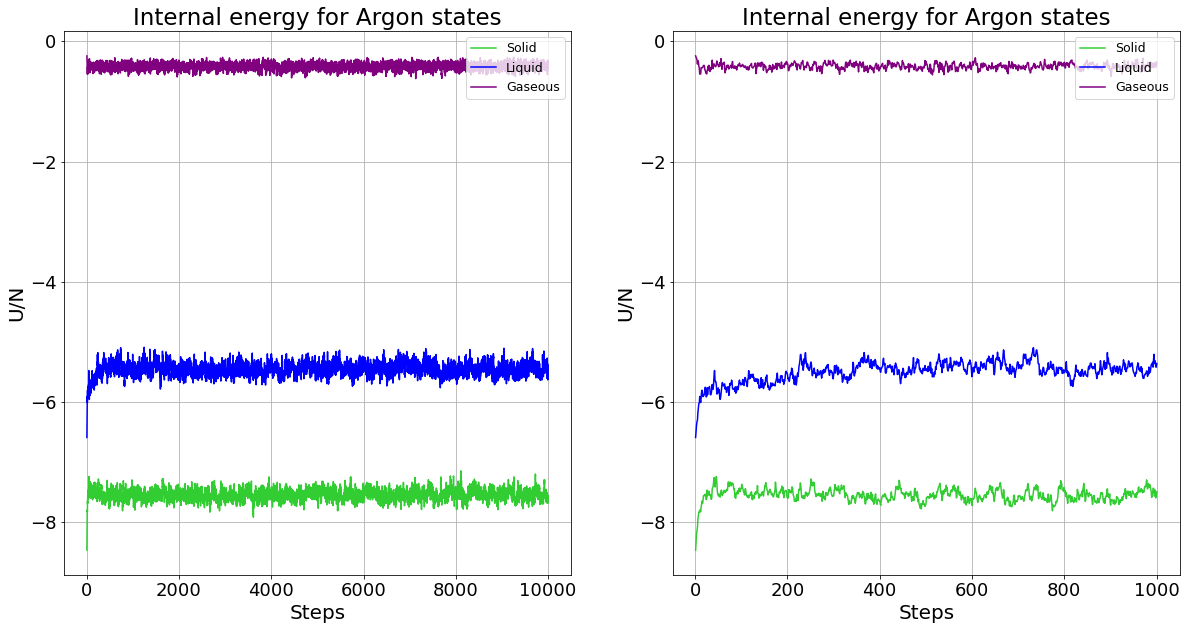

In [2]:
steps_s, stima_u_s  = np.loadtxt("equilib_folder/solid_equilibration.dat", unpack=True, usecols=(0,1))
steps_l, stima_u_l  = np.loadtxt("equilib_folder/liquid_equilibration.dat", unpack=True, usecols=(0,1))
steps_g, stima_u_g  = np.loadtxt("equilib_folder/gas_equilibration.dat", unpack=True, usecols=(0,1))

fig , [ax0 , ax1] = plt.subplots( 1 , 2 , figsize = (20,10))

ax0.plot(steps_s, stima_u_s, color="limegreen",label="Solid")
ax0.plot(steps_l, stima_u_l, color="blue", label="Liquid")
ax0.plot(steps_g, stima_u_g, color="purple", label="Gaseous")
ax0.set_xlabel("Steps", fontsize=20)
ax0.set_ylabel(r'U/N', fontsize=20)
ax0.grid(True)
ax0.set_title('Internal energy for Argon states',fontsize=23)
ax0.legend(loc=1, fontsize="x-small")

ax1.plot(steps_s[0:1000], stima_u_s[0:1000], color="limegreen",label="Solid")
ax1.plot(steps_l[0:1000], stima_u_l[0:1000], color="blue", label="Liquid")
ax1.plot(steps_g[0:1000], stima_u_g[0:1000], color="purple", label="Gaseous")
ax1.set_xlabel("Steps", fontsize=20)
ax1.set_ylabel(r'U/N', fontsize=20)
ax1.grid(True)
ax1.set_title('Internal energy for Argon states',fontsize=23)
ax1.legend(loc=1, fontsize="x-small")


plt.show()

I grafici mostrano l'andamento dell'energia potenziale per particella, già migliorato con le correzioni di coada dell'energia e della pressione, nei tre stati in cui viene simulato il comportamento dell'Argon. Ho svolto l'equilibrazione del sistema, simulato tramite algoritmo di Montecarlo, con $10^4$ estrazioni da cui ho valutato l'energia media per ogni particella. Si vede facilemnete che il numero di estrazione scelto risulta eccessivo e dal grafico a destra si capisce che già dopo 200 step il sistema risulta in equilibrio. Ho quindi deciso di non inserire il contributo dei primi 1000 step nel calcolo delle proprietà fisiche medie del sistema.

### $\delta$' Metropolis for Argon's gas state

In [3]:
x = np.arange(10000)
acc_gas = []  # create an empty list to store the data
for i in range(1, 7):
    data = np.loadtxt("acceptance_folder/gas_acc_" + str(i) + ".000000.dat", unpack=True, usecols=(2))
    acc_gas.append(data)  # add the data to the list

for i in range(1, 7):
    print('δ usato:\t' + str(i) + '\nacceptance rate:\t' + str(np.mean(acc_gas[int(i)-1])) + '\n')

δ usato:	1
acceptance rate:	0.7871207800000001

δ usato:	2
acceptance rate:	0.69445758

δ usato:	3
acceptance rate:	0.65443356

δ usato:	4
acceptance rate:	0.6396388399999999

δ usato:	5
acceptance rate:	0.63071696

δ usato:	6
acceptance rate:	0.62469846



Riporto i differenti valori del tasso di accettazione medio per lo stato gassoso dell'Argon al variare della dimensione della delta utilizzato nell'algoritmo di Metropolis. Affinchè l'algoritmo funzioni bene è necessario che il tasso diaccettazione rimanga intorno al $50\%$. Nello stato gassoso l'energia interna medie delle particelle non varia sensibilmente che un cambio della delta con cui viene selezionata una possibile posizione in cui spostare la particelle. Oltre a ciò intervengono le condizioni al contorno del sitema che fanno si che aumentare ulteriormaente una delta non servirebbe ad far muovere maggiormente la particella. Ho quindi selezionato una $\delta=6\;[r.u]$ poco più grande del $r_{cut}$ per lo stato gassoso.

Per gli altri due stati dell'Argon non è stato necessario determinare la delta poicè essa dava già un'accettanza del $50\%$:  $\delta_{solid}=0.12\;[r.u]$, $\delta_{liquid}=0.2\;[r.u]$.

##  <span style="color:red"> Autocorrelation</span>  

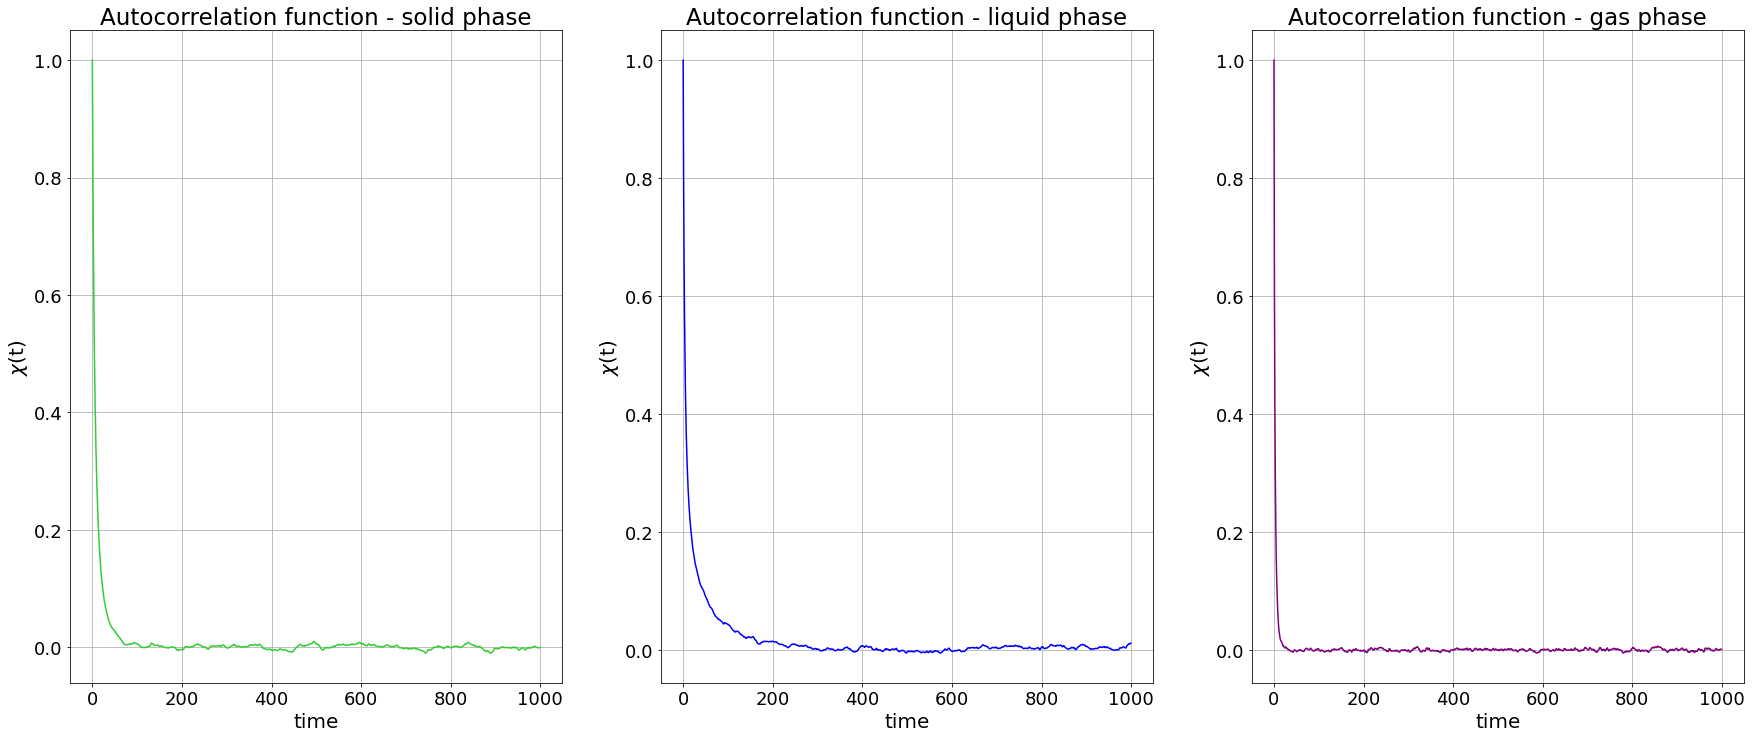

In [50]:
steps_s, stima_u_s  = np.loadtxt("correlation_folder/solid_correlation.dat", unpack=True, usecols=(0,1))
steps_l, stima_u_l  = np.loadtxt("correlation_folder/liquid_correlation.dat", unpack=True, usecols=(0,1))
steps_g, stima_u_g  = np.loadtxt("correlation_folder/gas_correlation.dat", unpack=True, usecols=(0,1))

solid_autocorrelation = autocorrelation(stima_u_s,1000)
liquid_autocorrelation = autocorrelation(stima_u_l,1000)
gas_autocorrelation = autocorrelation(stima_u_g,1000)

time = np.arange(1000)

fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(30 , 12))

ax0.plot(time, solid_autocorrelation, color="limegreen")
ax1.plot(time, liquid_autocorrelation, color="blue")
ax2.plot(time, gas_autocorrelation, color="purple")
for i in range(3):
    globals()['ax'+str(i)].set_xlabel("time", fontsize=20)
    globals()['ax'+str(i)].set_ylabel(r'$\chi$(t)', fontsize=20)
    globals()['ax'+str(i)].grid(True)
ax0.set_title('Autocorrelation function - solid phase',fontsize=23)
ax1.set_title('Autocorrelation function - liquid phase', fontsize=23)
ax2.set_title('Autocorrelation function - gas phase', fontsize=23)
plt.show()

I grafici mostrano l'andamento della funzione di autocorrelzione per i tre stati dell'Argon in funzione del tempo. Risulta chiaro che l'autocorrelazione sia significativa per tempi brevi dove la dipendenza di una mossa da quelle precedenti è forte. Per tempi sempre più lunghi la funzione deresce fino ad oscillare intorno ad un valore nullo. Per lo stato gasso l'autoccorelazione scende velocemente a zero poichè nella simulazione Monte Carlo l'intervallo di campionamento di una nuova posizione è molto ampio e quindi il sistema raggiunge facilemnete configurazioni diverse da quella iniziali. Per tutti e tre gli stati dopo $\sim200\;[r.u]$ l'autocorrelazione è praticamente nulla.

Per le tre fasi dell'Argon ho utilizzato $M=5\cdot10^5$ steps.

###  <span style="color:red"> Autocorrelation - errors</span> 

In [51]:
L = np.array([x for x in range(10,5001) if (500000%x ==0)])
blocks = 5*10**5// L

#error function
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if np.all(n == 0):
        return np.zeros_like(n)
    else:
        return np.sqrt((AV2 - AV**2)/n)

def statistic_sigma(array, blocks):
    ave = np.zeros(blocks)
    av2 = np.zeros(blocks)
    sum_prog = np.zeros(blocks)
    su2_prog = np.zeros(blocks)
    err_prog = np.zeros(blocks)

    for i in range(blocks):
        L_steps=int(500000/blocks)
        sum1 = sum(array[i*L_steps:(i+1)*L_steps])
        ave[i] = sum1/L_steps     
        av2[i] = (ave[i])**2  

    sum_prog = np.cumsum(ave) / np.arange(1, blocks+1)
    su2_prog = np.cumsum(av2) / np.arange(1, blocks+1)
    err_prog = error(sum_prog,su2_prog,np.arange(1,blocks+1))
    return err_prog[-1]

def calculate_errors(args):
    array, blocks = args
    return statistic_sigma(array, blocks)

In [52]:
errors_solid=np.zeros(len(blocks))
errors_liquid=np.zeros(len(blocks))
errors_gas=np.zeros(len(blocks))

if __name__ == '__main__':
    with Pool() as pool:
        errors_solid = pool.map(calculate_errors, [(stima_u_s, b) for b in blocks])
        errors_liquid = pool.map(calculate_errors, [(stima_u_l, b) for b in blocks])
        errors_gas = pool.map(calculate_errors, [(stima_u_g, b) for b in blocks])

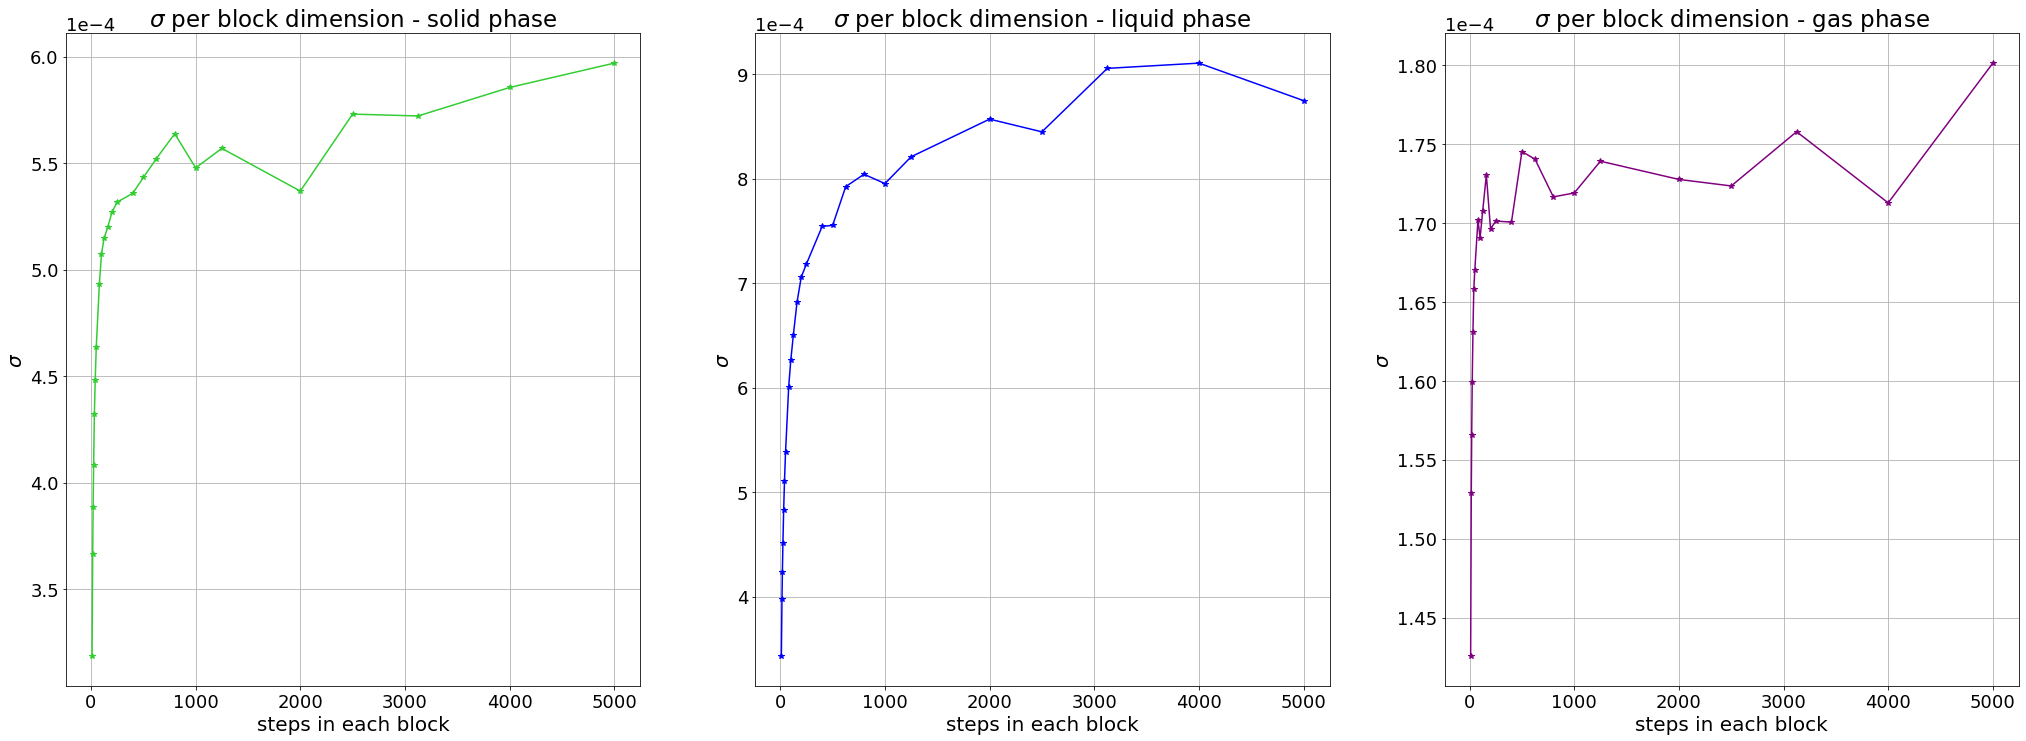

In [53]:
fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(35 , 12))

ax0.plot(L, errors_solid, color="limegreen",marker= "*")
ax1.plot(L, errors_liquid, color="blue", marker= "*")
ax2.plot(L, errors_gas, color="purple", marker= "*")
for i in range(3):
    globals()['ax'+str(i)].set_xlabel("steps in each block", fontsize=20)
    globals()['ax'+str(i)].set_ylabel(r'$\sigma$', fontsize=20)
    globals()['ax'+str(i)].grid(True)
    globals()['ax'+str(i)].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax0.set_title(r'$\sigma$ per block dimension - solid phase',fontsize=23)
ax1.set_title(r'$\sigma$ per block dimension - liquid phase', fontsize=23)
ax2.set_title(r'$\sigma$ per block dimension - gas phase', fontsize=23)
plt.show()

I grafici riportano l'errrore medio sulle misure in funzione nel numero di estrazioni per blocco nel calcolo della media a blocchi. Come aspettato, l'andamento dell'errore ha una rapida crescita man mano che si passa da blocchi piccoli a blocchi più grandi fino a saturarsi intorno ad un valore medio. Il valore dell'erorre per piccoli blocchi viene sottostimato, a causa dell'autocorrelazione, apparendo più piccolo rispetto a blocchi più grandi. Per tutte e tre le fasi già intono a $2000$ valori per blocco il valore dell'errore statistico satura. 

Per ottenere quindi un errore statistico rappresentativo del sistema che voglio rappresentare in differenti condizioni ho deciso di fissare il numero di blocchi a $125$, ottenendo così $2000$ passi per blocco, con un numero di estrazioni totale paria a $M=2.5\cdot10^5$.

## Exercise 07.4

### Convert from r.u to SI

Come per l'esercizio 4, le unità ridotte risultano utili per risolvere il porblema. Si ricorda che le conversioni tra il sitema ridotto dell'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) ed il Sistema Internazionale sono: 

1. Lunghezza $r=r^{\star}\sigma$.
2. Temperatura $T=T^{\star}\epsilon/k_B$.
3. Energia $E=E^{\star}\epsilon$.
4. Pressione $P=P^{\star}\sigma^3/\epsilon$.
5. Densità $\rho=\rho^{\star}/\sigma^3$.

###  <span style="color:red"> Solid state</span> 

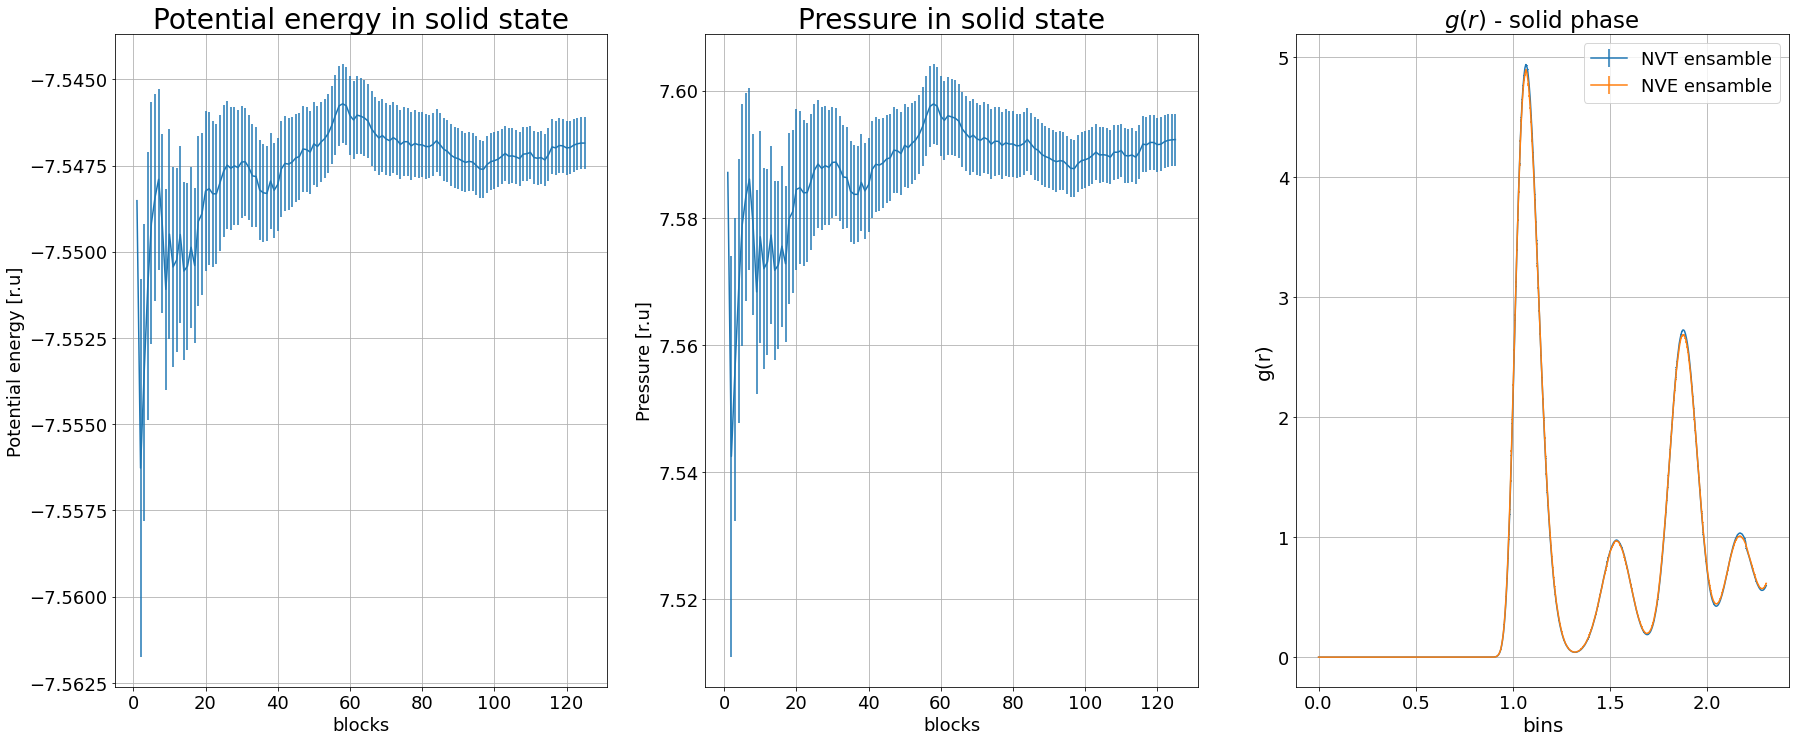

In [56]:
bins_s, g_r_s, error_g_s = np.loadtxt("output_folder/1solid_isto_final.dat", unpack=True, usecols=(0,1,2), delimiter=",")
bins_s_md, g_r_s_md, error_g_s_md = np.loadtxt("output_folder/0solid_isto_final.dat", unpack=True, usecols=(0,1,2), delimiter=",")
epot_solid_mc, epot_err_s_mc = np.loadtxt("output_folder/1solid_epot.dat", unpack=True, usecols=(2,3))
pres_solid_mc, pres_err_s_mc = np.loadtxt("output_folder/1solid_pres.dat", unpack=True, usecols=(2,3))

blocks = np.arange(125)

fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(30 , 12))

ax0.errorbar(blocks+1, epot_solid_mc , yerr= epot_err_s_mc)
ax1.errorbar(blocks+1, pres_solid_mc , yerr= pres_err_s_mc)

ax0.set_xlabel("blocks", fontsize=18)
ax0.set_ylabel("Potential energy [r.u]", fontsize=18)
ax0.set_title("Potential energy in solid state",  fontsize=28)
ax0.grid(True)

ax1.set_xlabel("blocks", fontsize=18)
ax1.set_ylabel("Pressure [r.u]", fontsize=18)
ax1.set_title("Pressure in solid state",  fontsize=28)
ax1.grid(True)

ax2.errorbar(bins_s, g_r_s, yerr=error_g_s, label="NVT ensamble")
ax2.errorbar(bins_s_md, g_r_s_md, yerr=error_g_s_md, label="NVE ensamble")
ax2.set_xlabel("bins", fontsize=20)
ax2.set_ylabel(r'g(r)', fontsize=20)
ax2.grid(True)
ax2.legend()

ax2.set_title('$g(r)$ - solid phase',fontsize=23)
plt.show()


I primi due grafici mostrano i valori di energia interna per particella e della pressione calcolati tramite media blocchi composta da  $125$ blocchi da $2000$ campionamenti di posizione con un totale di $M=2.5\cdot10^5$ estrazioni, per l'Argon allo stato solido. Codesti valori sono stati corretti con i termini di coda, trascurati nella esercitazione 4. 

Il terzo grafico mostra l'andamento della funzione di distribuzione a coppie per un sistema campionato con l'algoritmo di Metropolis ed un sistema campionato con un'algortimo di Dinamica Molecolare. Quest'ultimo è stato equilibrato seguendo i passaggi riportati nell'esercitazione 4. I grafici associati a queste funzioni si sovrappongono quasi perfettamente, segno della bontà di entrambi gli algoritmi nel simulare un sistema reale in queste condizioni.

###  <span style="color:red"> Liquid state</span> 

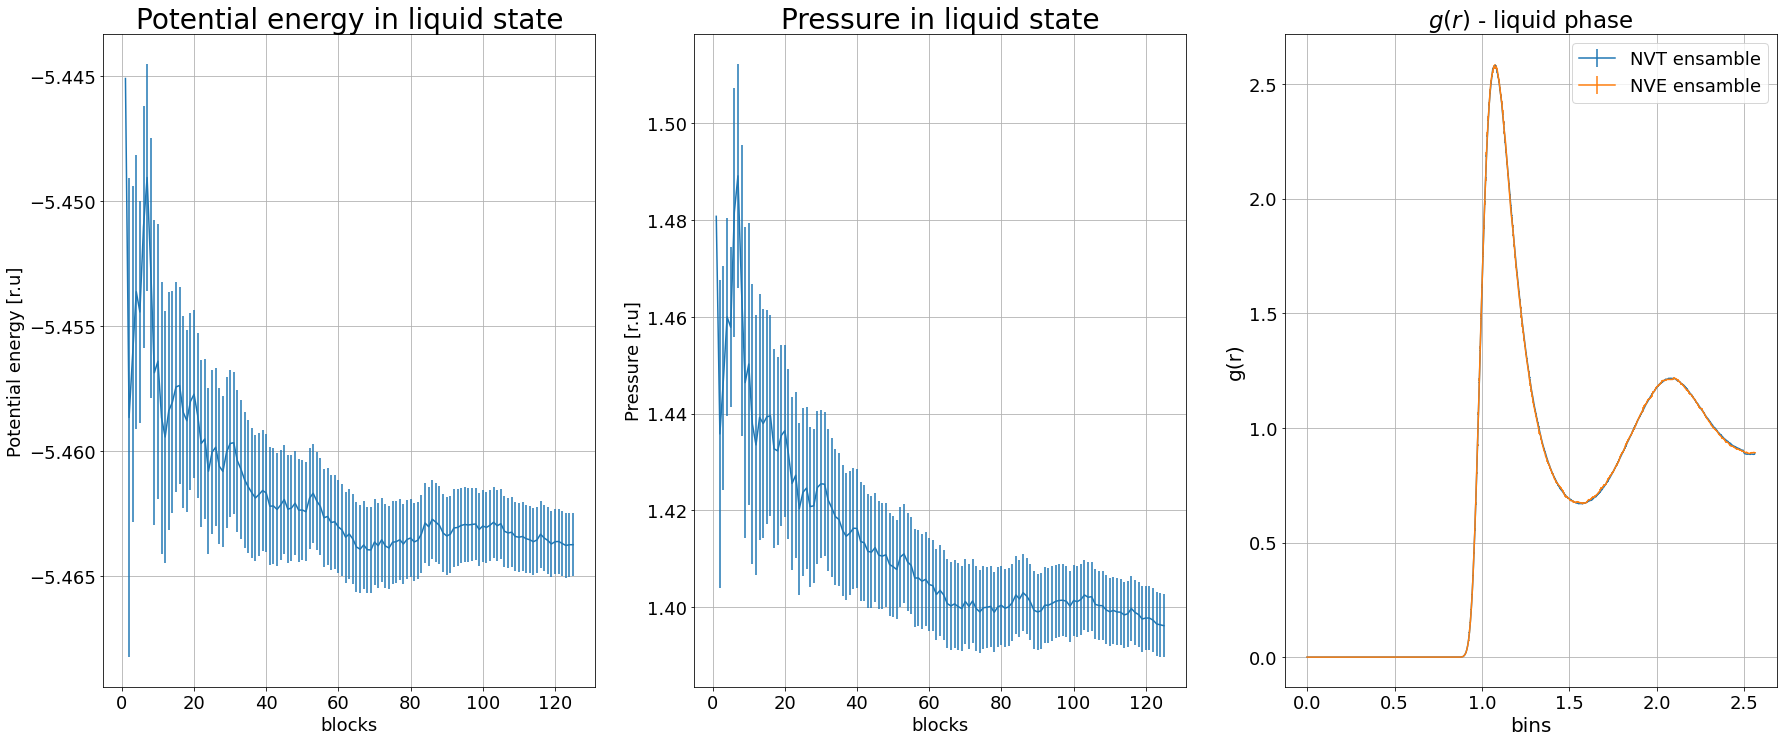

In [62]:
bins, g_r, error_g = np.loadtxt("output_folder/1liquid_isto_final.dat", unpack=True, usecols=(0,1,2), delimiter=",")
bins_md, g_r_md, error_g_md = np.loadtxt("output_folder/0liquid_isto_final.dat", unpack=True, usecols=(0,1,2), delimiter=",")
epot_mc, epot_err_mc = np.loadtxt("output_folder/1liquid_epot.dat", unpack=True, usecols=(2,3))
pres_mc, pres_err_mc = np.loadtxt("output_folder/1liquid_pres.dat", unpack=True, usecols=(2,3))

blocks = np.arange(125)

fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(30 , 12))

ax0.errorbar(blocks+1, epot_mc , yerr= epot_err_mc)
ax1.errorbar(blocks+1, pres_mc , yerr= pres_err_mc)

ax0.set_xlabel("blocks", fontsize=18)
ax0.set_ylabel("Potential energy [r.u]", fontsize=18)
ax0.set_title("Potential energy in liquid state",  fontsize=28)
ax0.grid(True)

ax1.set_xlabel("blocks", fontsize=18)
ax1.set_ylabel("Pressure [r.u]", fontsize=18)
ax1.set_title("Pressure in liquid state",  fontsize=28)
ax1.grid(True)

ax2.errorbar(bins, g_r, yerr=error_g, label="NVT ensamble")
ax2.errorbar(bins_md, g_r_md, yerr=error_g_md, label="NVE ensamble")
ax2.set_xlabel("bins", fontsize=20)
ax2.set_ylabel(r'g(r)', fontsize=20)
ax2.grid(True)
ax2.legend()

ax2.set_title('$g(r)$ - liquid phase',fontsize=23)
plt.show()

I primi due grafici mostrano i valori di energia interna per particella e della pressione calcolati tramite media blocchi composta da $125$ blocchi da $2000$ campionamenti di posizione con un totale di $M=2.5\cdot10^5$ estrazioni, per l'Argon allo stato liquido. Anche in questo caso i valori sono stati correti per i termini di coda. 

Il terzo grafico mostra l'andamento della funzione di distribuzione a coppie per un sistema campionato con l'algoritmo di Metropolis ed un sistema campionato con un'algortimo di Dinamica Molecolare equilibrato. I grafici associati a queste funzioni si sovrappongono quasi perfettamente come per il caso solido e riproducono bene l'andamento teorico.

Si nota che complissavemente la pressione della fase liquidi risulta minore rispetto a quella colcata per la fase solida, essendo il sistema liquido meno legato di quello solido.

###  <span style="color:red"> Gaseous state</span> 

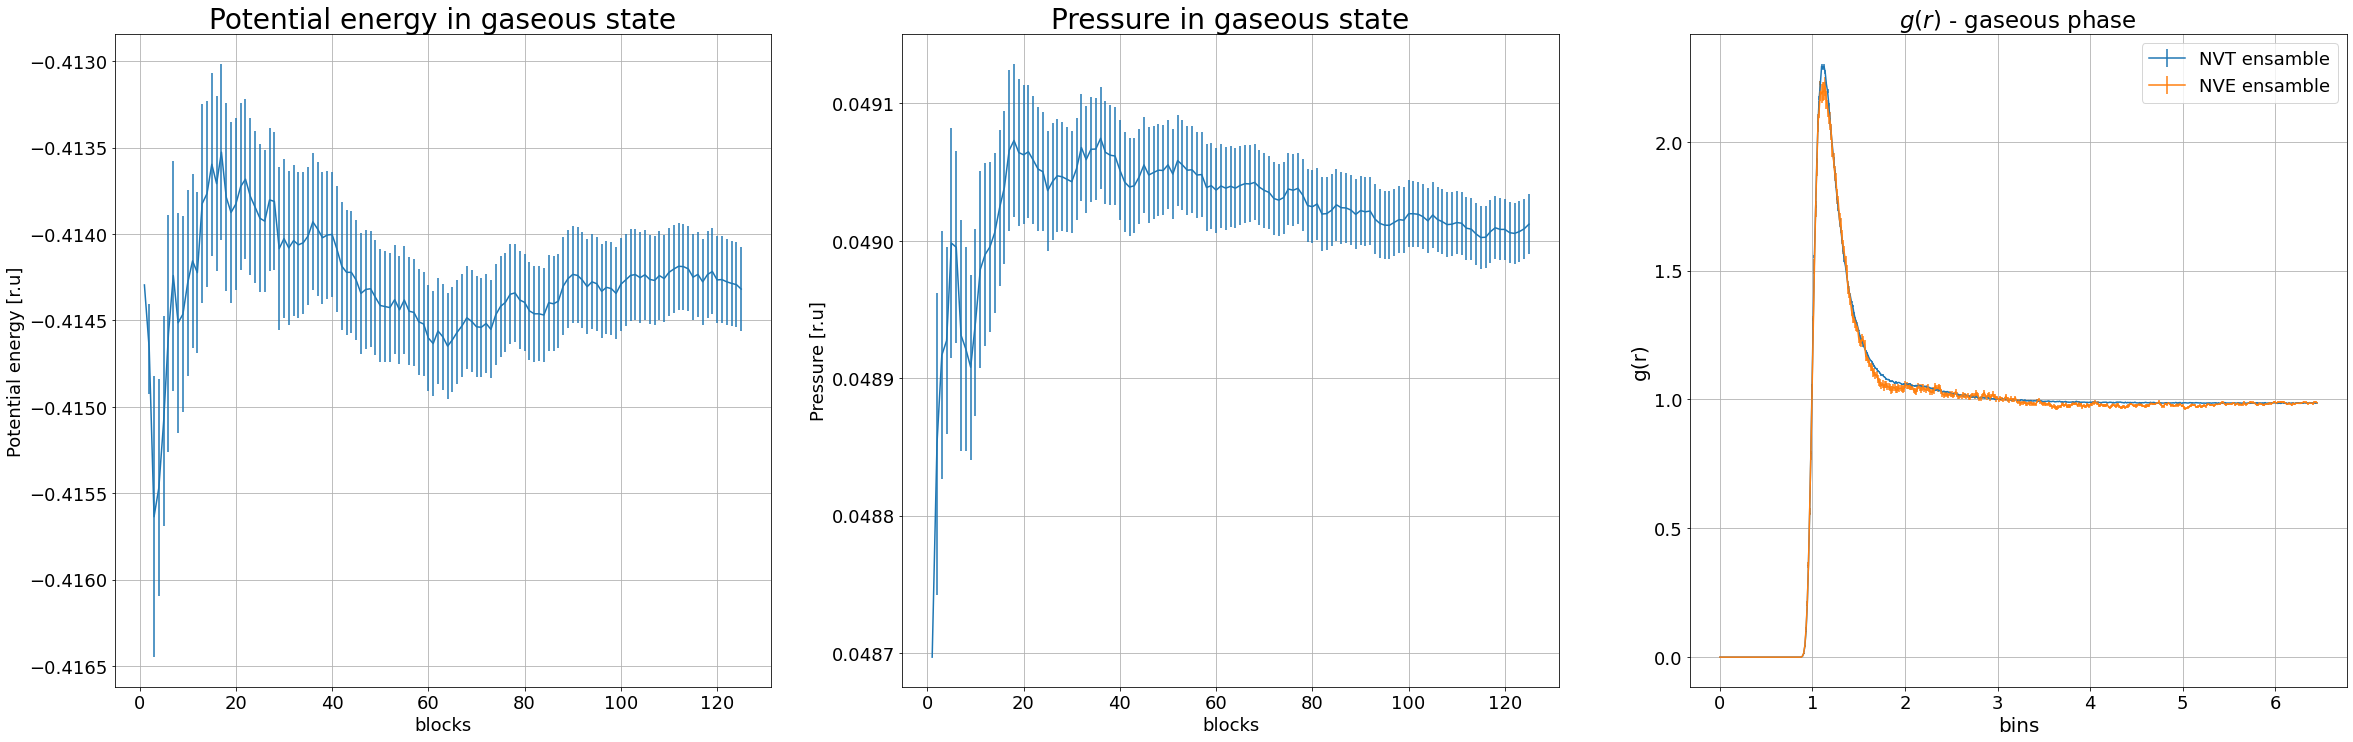

In [61]:
bins, g_r, error_g = np.loadtxt("output_folder/1gas_isto_final.dat", unpack=True, usecols=(0,1,2), delimiter=",")
bins_md, g_r_md, error_g_md = np.loadtxt("output_folder/0gas_isto_final.dat", unpack=True, usecols=(0,1,2), delimiter=",")
epot_mc, epot_err_mc = np.loadtxt("output_folder/1gas_epot.dat", unpack=True, usecols=(2,3))
pres_mc, pres_err_mc = np.loadtxt("output_folder/1gas_pres.dat", unpack=True, usecols=(2,3))

blocks = np.arange(125)

fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(40 , 12))

ax0.errorbar(blocks+1, epot_mc , yerr= epot_err_mc)
ax1.errorbar(blocks+1, pres_mc , yerr= pres_err_mc)

ax0.set_xlabel("blocks", fontsize=18)
ax0.set_ylabel("Potential energy [r.u]", fontsize=18)
ax0.set_title("Potential energy in gaseous state",  fontsize=28)
ax0.grid(True)

ax1.set_xlabel("blocks", fontsize=18)
ax1.set_ylabel("Pressure [r.u]", fontsize=18)
ax1.set_title("Pressure in gaseous state",  fontsize=28, loc='center')
ax1.ticklabel_format(axis="y", style="scientific", useOffset=False)
ax1.grid(True)

ax2.errorbar(bins, g_r, yerr=error_g, label="NVT ensamble")
ax2.errorbar(bins_md, g_r_md, yerr=error_g_md, label="NVE ensamble")
ax2.set_xlabel("bins", fontsize=20)
ax2.set_ylabel(r'g(r)', fontsize=20)
ax2.grid(True)
ax2.legend()

ax2.set_title('$g(r)$ - gaseous phase',fontsize=23)
plt.show()

Anche in questo ultimo caso i primi due grafici mostrano i valori di energia interna per particella e della pressione, per l'Argon allo stato gassoso, calcolati tramite media blocchi composta da $125$ blocchi da $2000$ campionamenti di posizione con un totale di $M=2.5\cdot10^5$ estrazioni. I valori sono stati correti per i termini di coda. 

Il terzo grafico mostra sempre l'andamento della funzione di distribuzione a coppie per un sistema campionato con l'algoritmo di Metropolis ed un sistema campionato con un'algortimo di Dinamica Molecolare equilibrato. A differenze delle fasi precedenti i grafici non sovrappongono perfettamente seppu manetgono un'andamento simile, con un picco iniziale ed un plateau a grandi distanze tra particelle, a quello teorico.

Si può notare facilmente che passando da una fase gassosa della materia ad un fase sempre più legata la pressione aumenta mentre l'energia interna dimiuisce sensibilmente con lo stato solido che ha pressione massima ed energia minima tra le fasi.

Il confronto tra i risultati ottenuti con un algoritmo stocastico (Metropolis) e un'algoritmo che descrive l'evoluzione fisica del sistema (DInamica Molelocolare) mostra come medelli statistici stocastici riproduco bene il compartamento di un sistema fisico reale che evolve secondo le equazioni del moto.